# 

# part 1 

#  part 2


# part 4


Dataset Info:
Shape: (290275, 12)

First 5 rows:
   year_of_reference month_of_reference fipe_code authentication  brand  \
0               2022            January  038001-6     vwmrywl5qs  Acura   
1               2022            January  038001-6     t9mt723qhz  Acura   
2               2022            January  038001-6     tr5wv4z21g  Acura   
3               2022            January  038001-6     s2xxsjz3mt  Acura   
4               2022            January  038001-6     rtm9gj7zk8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  \
0  NSX 3.0  Gasoline  manual          3.0        1995          43779   
1  NSX 3.0  Gasoline  manual          3.0        1994          42244   
2  NSX 3.0  Gasoline  manual          3.0        1993          40841   
3  NSX 3.0  Gasoline  manual          3.0        1992          39028   
4  NSX 3.0  Gasoline  manual          3.0        1991          35678   

   age_years  
0         28  
1         29  
2         30  
3      

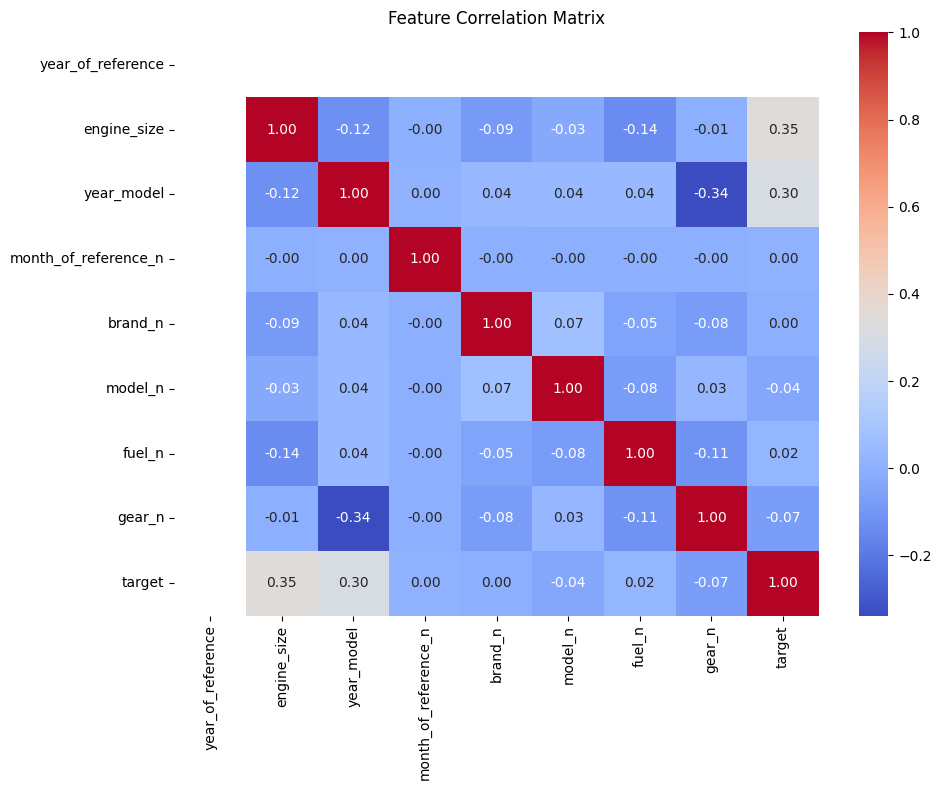


Training Random Forest...
Training completed in 72.8446 seconds
Inference time: 2765.23 milliseconds
MSE: 192537245.51
RMSE: 13875.78
MAE: 3097.37
R² Score: 0.9980
Accuracy (within 10% threshold): 0.9749
Precision: 0.9775
Recall: 0.9724
F1-Score: 0.9750

Training Bagging Regressor...
Training completed in 7.0934 seconds
Inference time: 271.92 milliseconds
MSE: 211414333.29
RMSE: 14540.09
MAE: 3192.56
R² Score: 0.9978
Accuracy (within 10% threshold): 0.9718
Precision: 0.9750
Recall: 0.9687
F1-Score: 0.9718

Training Decision Tree...
Training completed in 1.0382 seconds
Inference time: 34.35 milliseconds
MSE: 261914528.95
RMSE: 16183.77
MAE: 3423.00
R² Score: 0.9973
Accuracy (within 10% threshold): 0.9557
Precision: 0.9637
Recall: 0.9486
F1-Score: 0.9561

Training Extra Trees Regressor...
Training completed in 49.3431 seconds
Inference time: 3182.16 milliseconds
MSE: 329593988.03
RMSE: 18154.72
MAE: 3491.27
R² Score: 0.9966
Accuracy (within 10% threshold): 0.9621
Precision: 0.9677
Recal

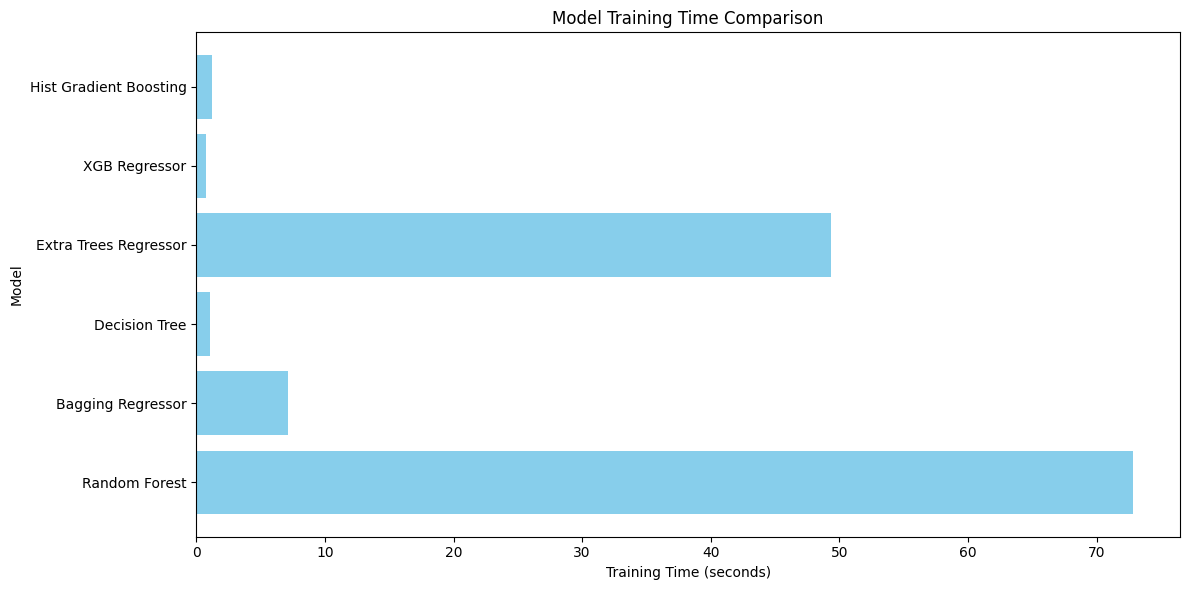

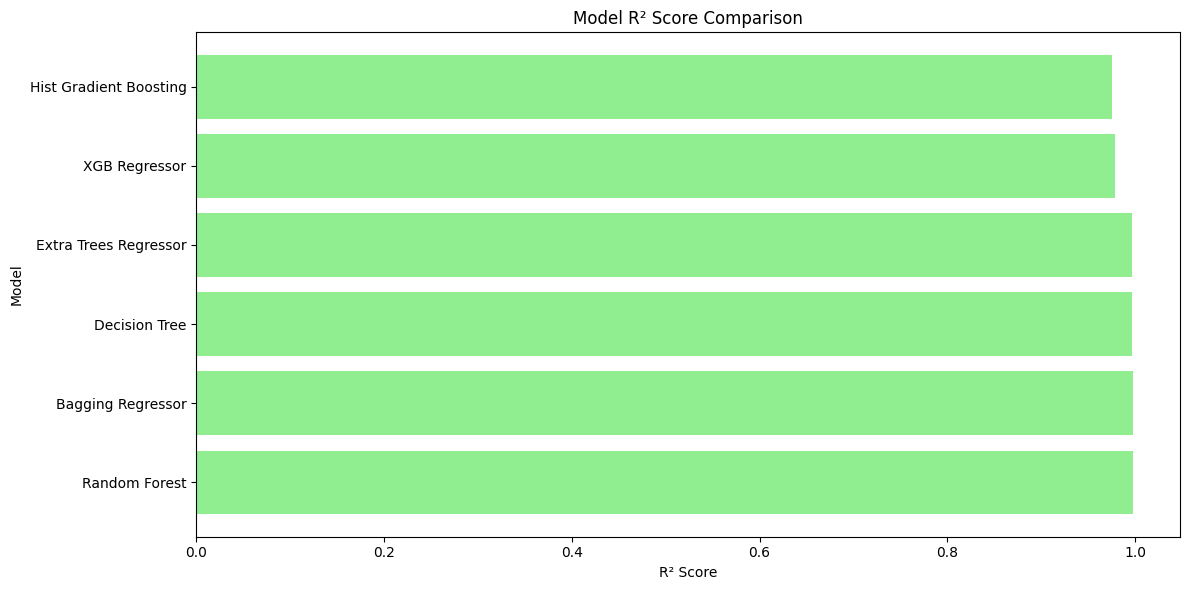

<Figure size 1400x800 with 0 Axes>

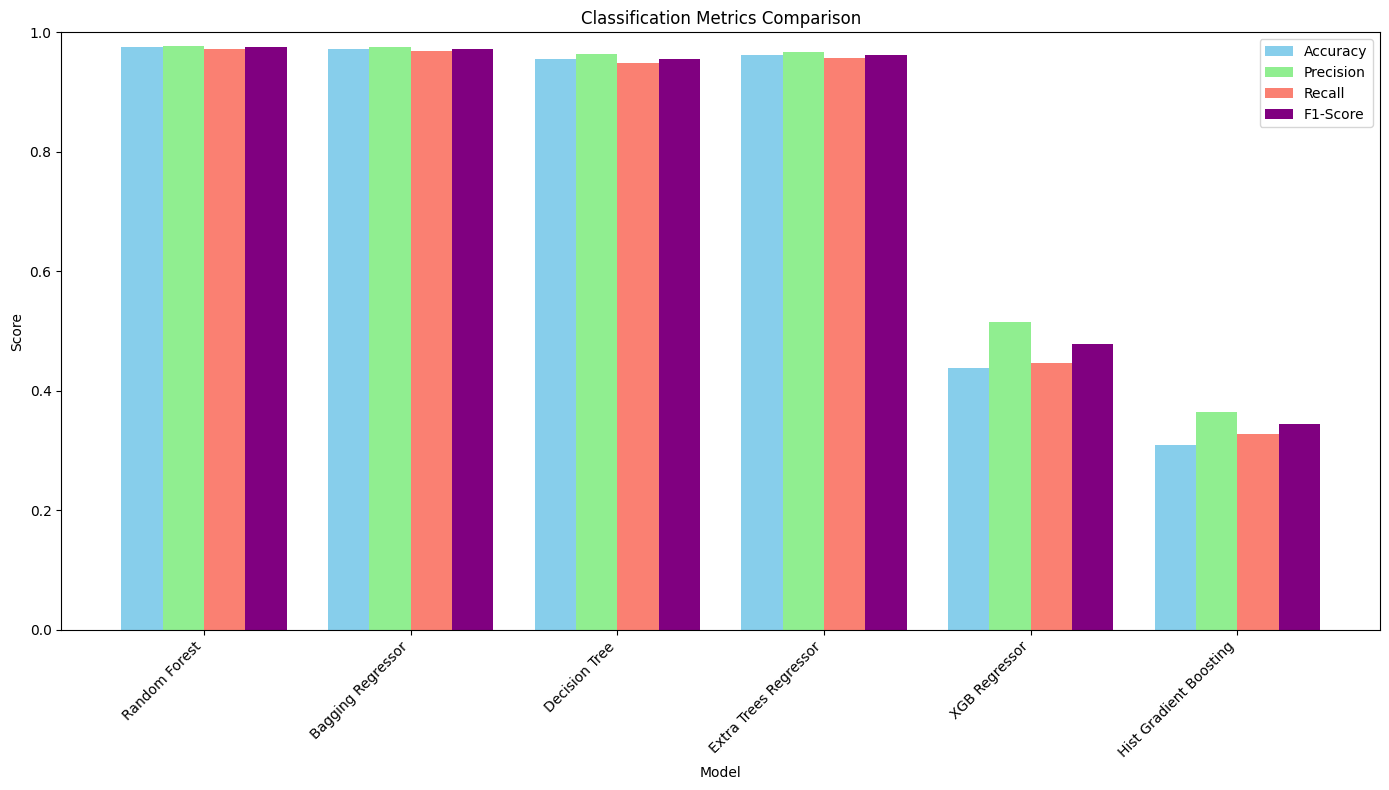

<Figure size 1200x1000 with 0 Axes>

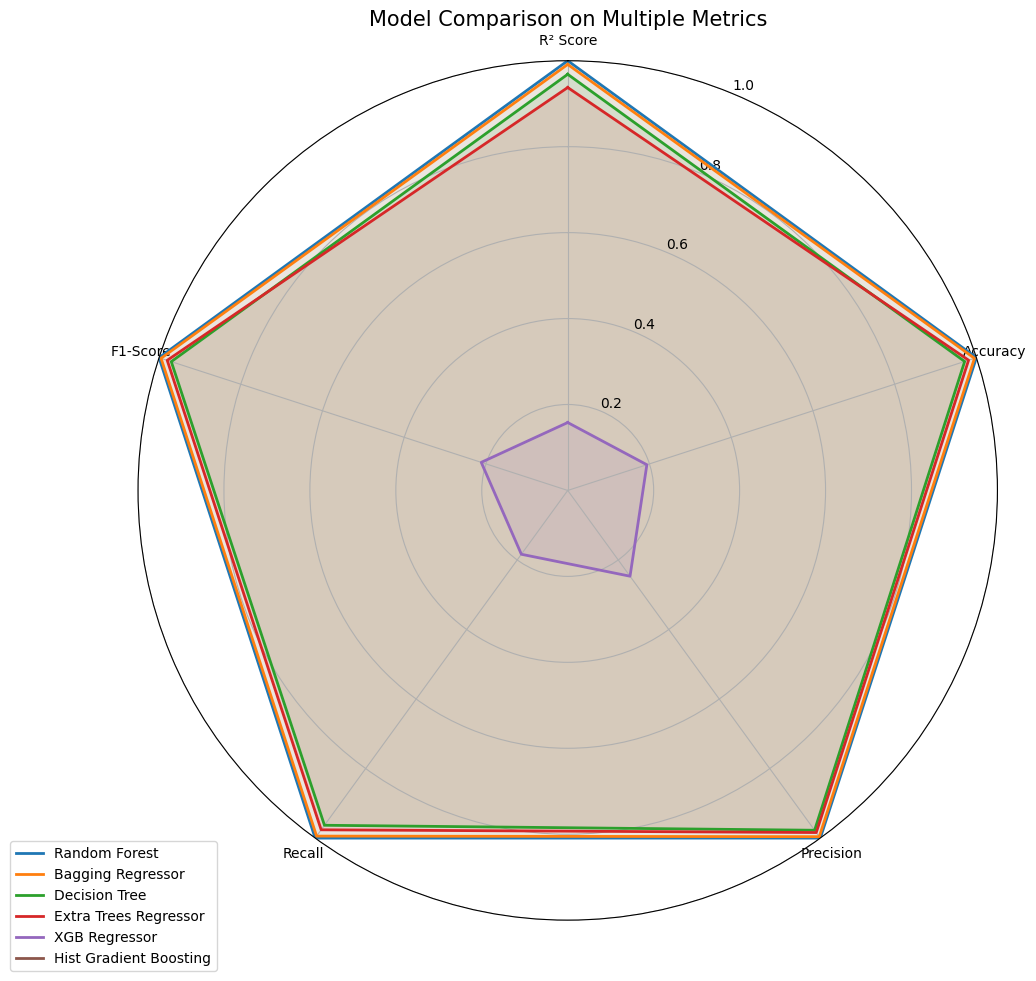

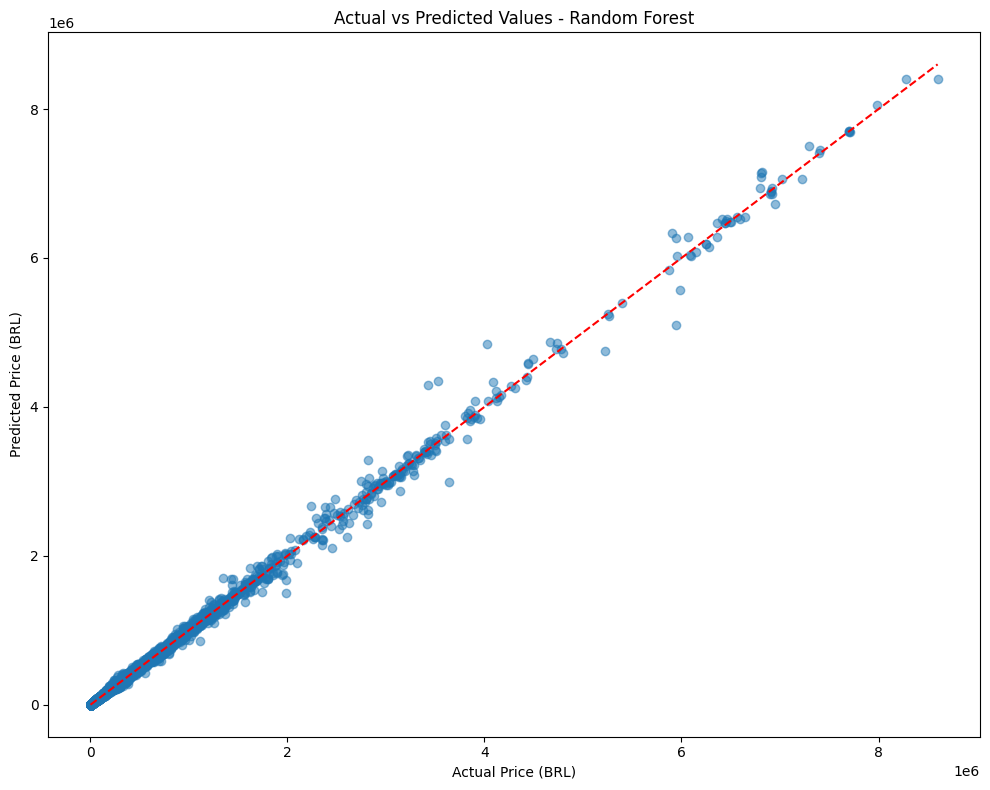

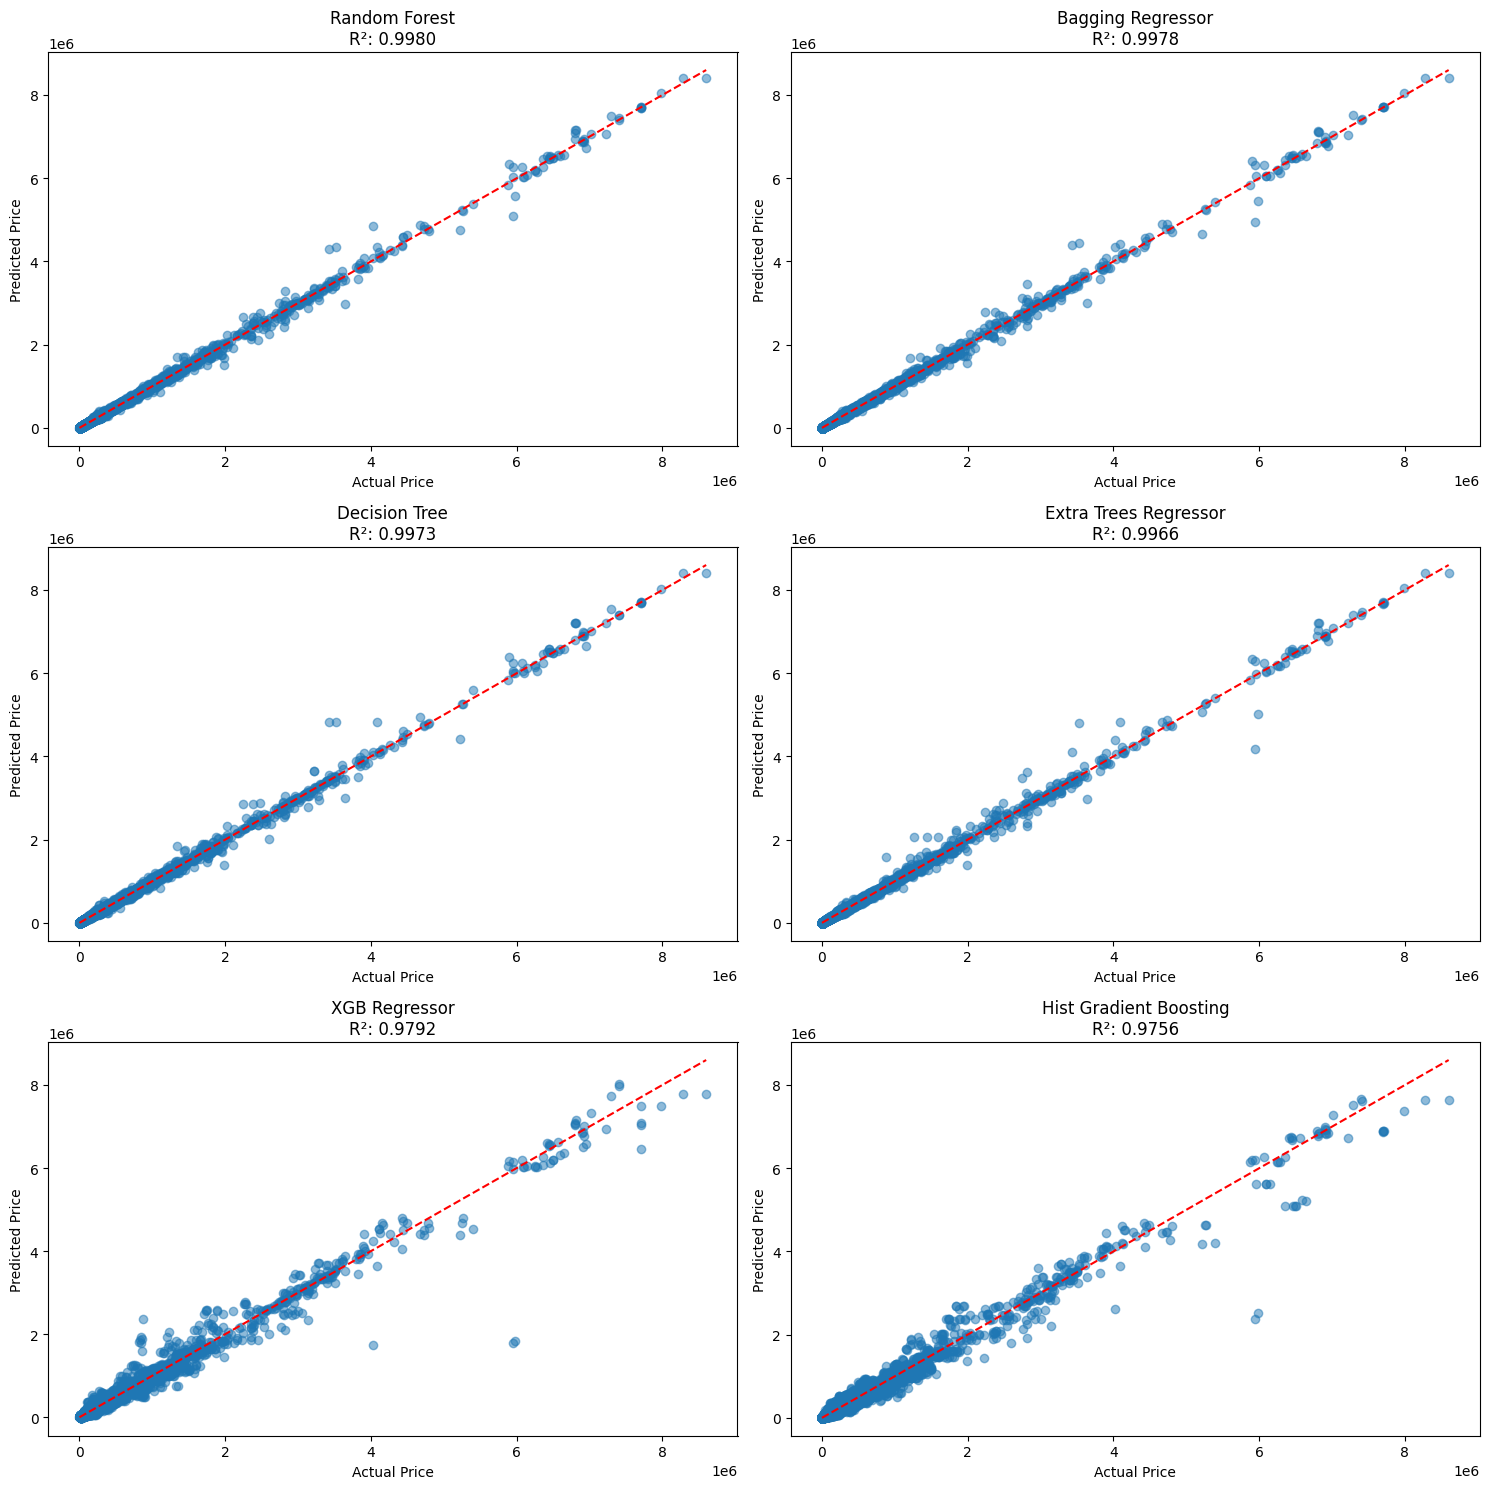

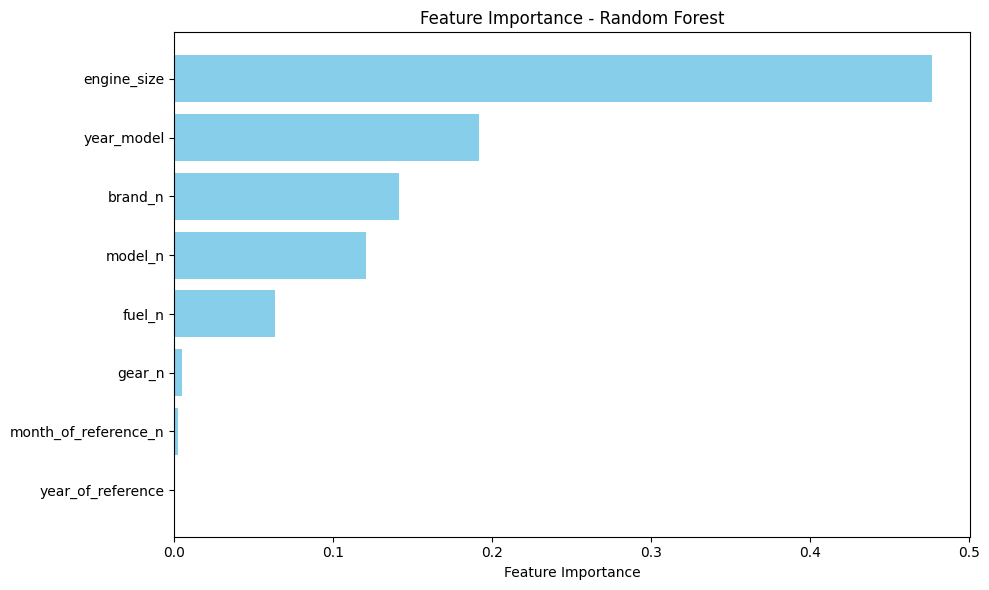

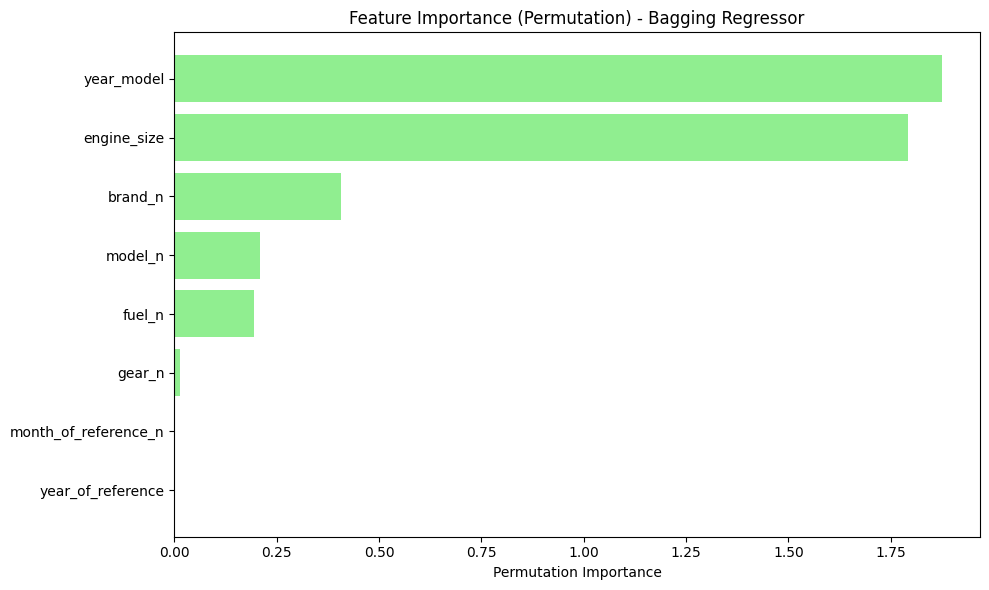

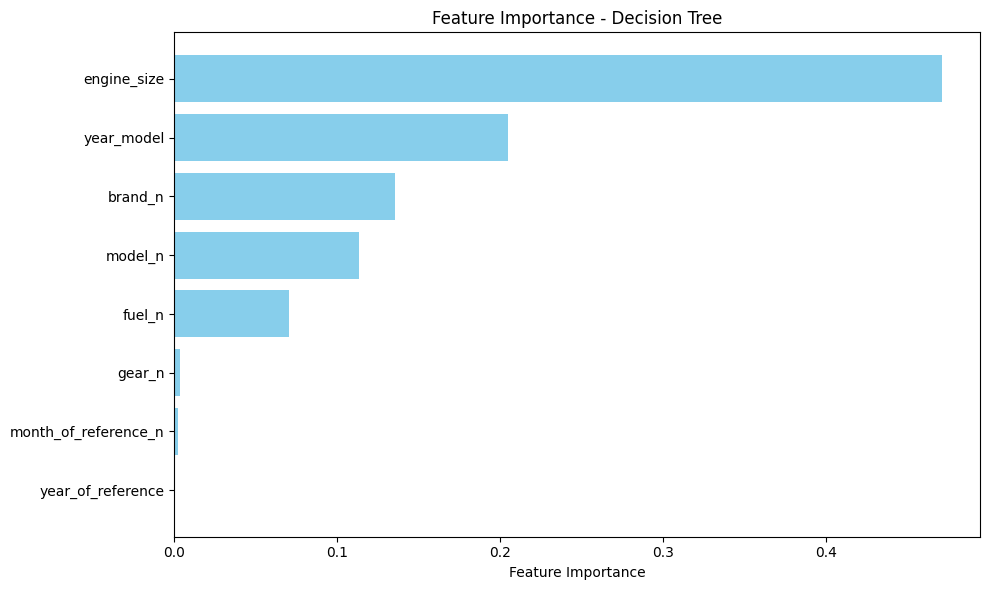

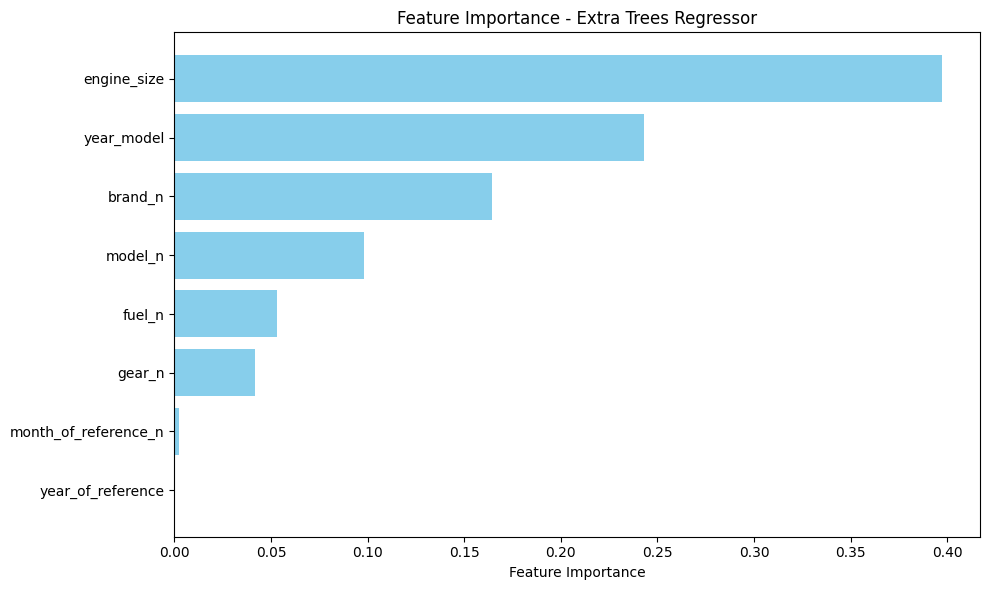

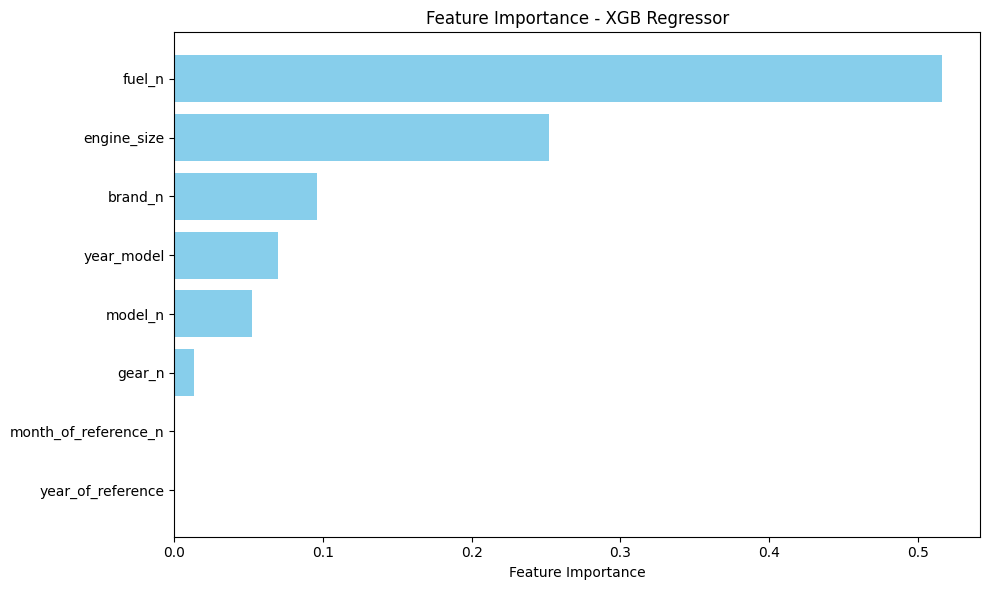

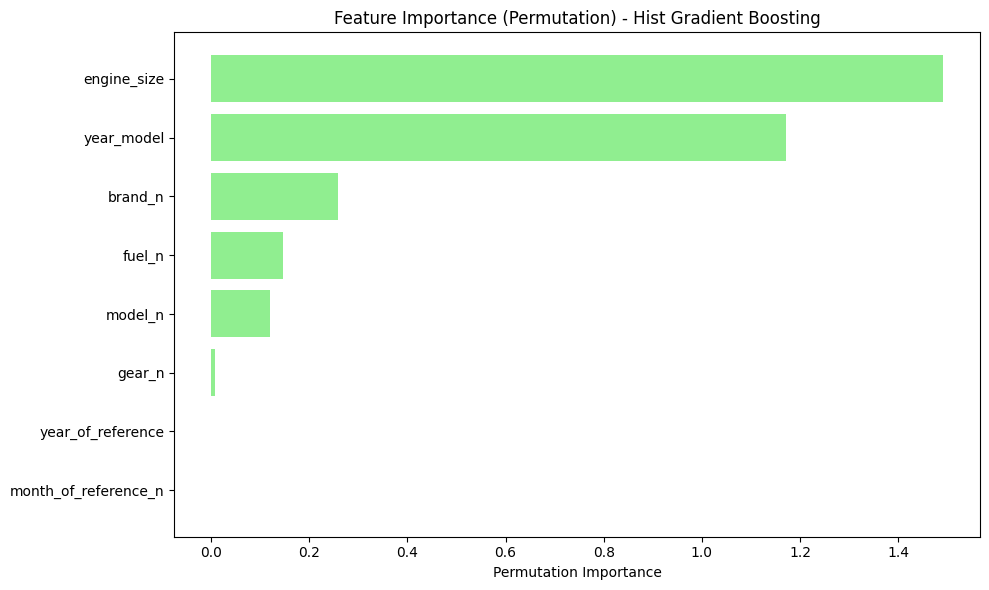

<Figure size 1500x1500 with 0 Axes>

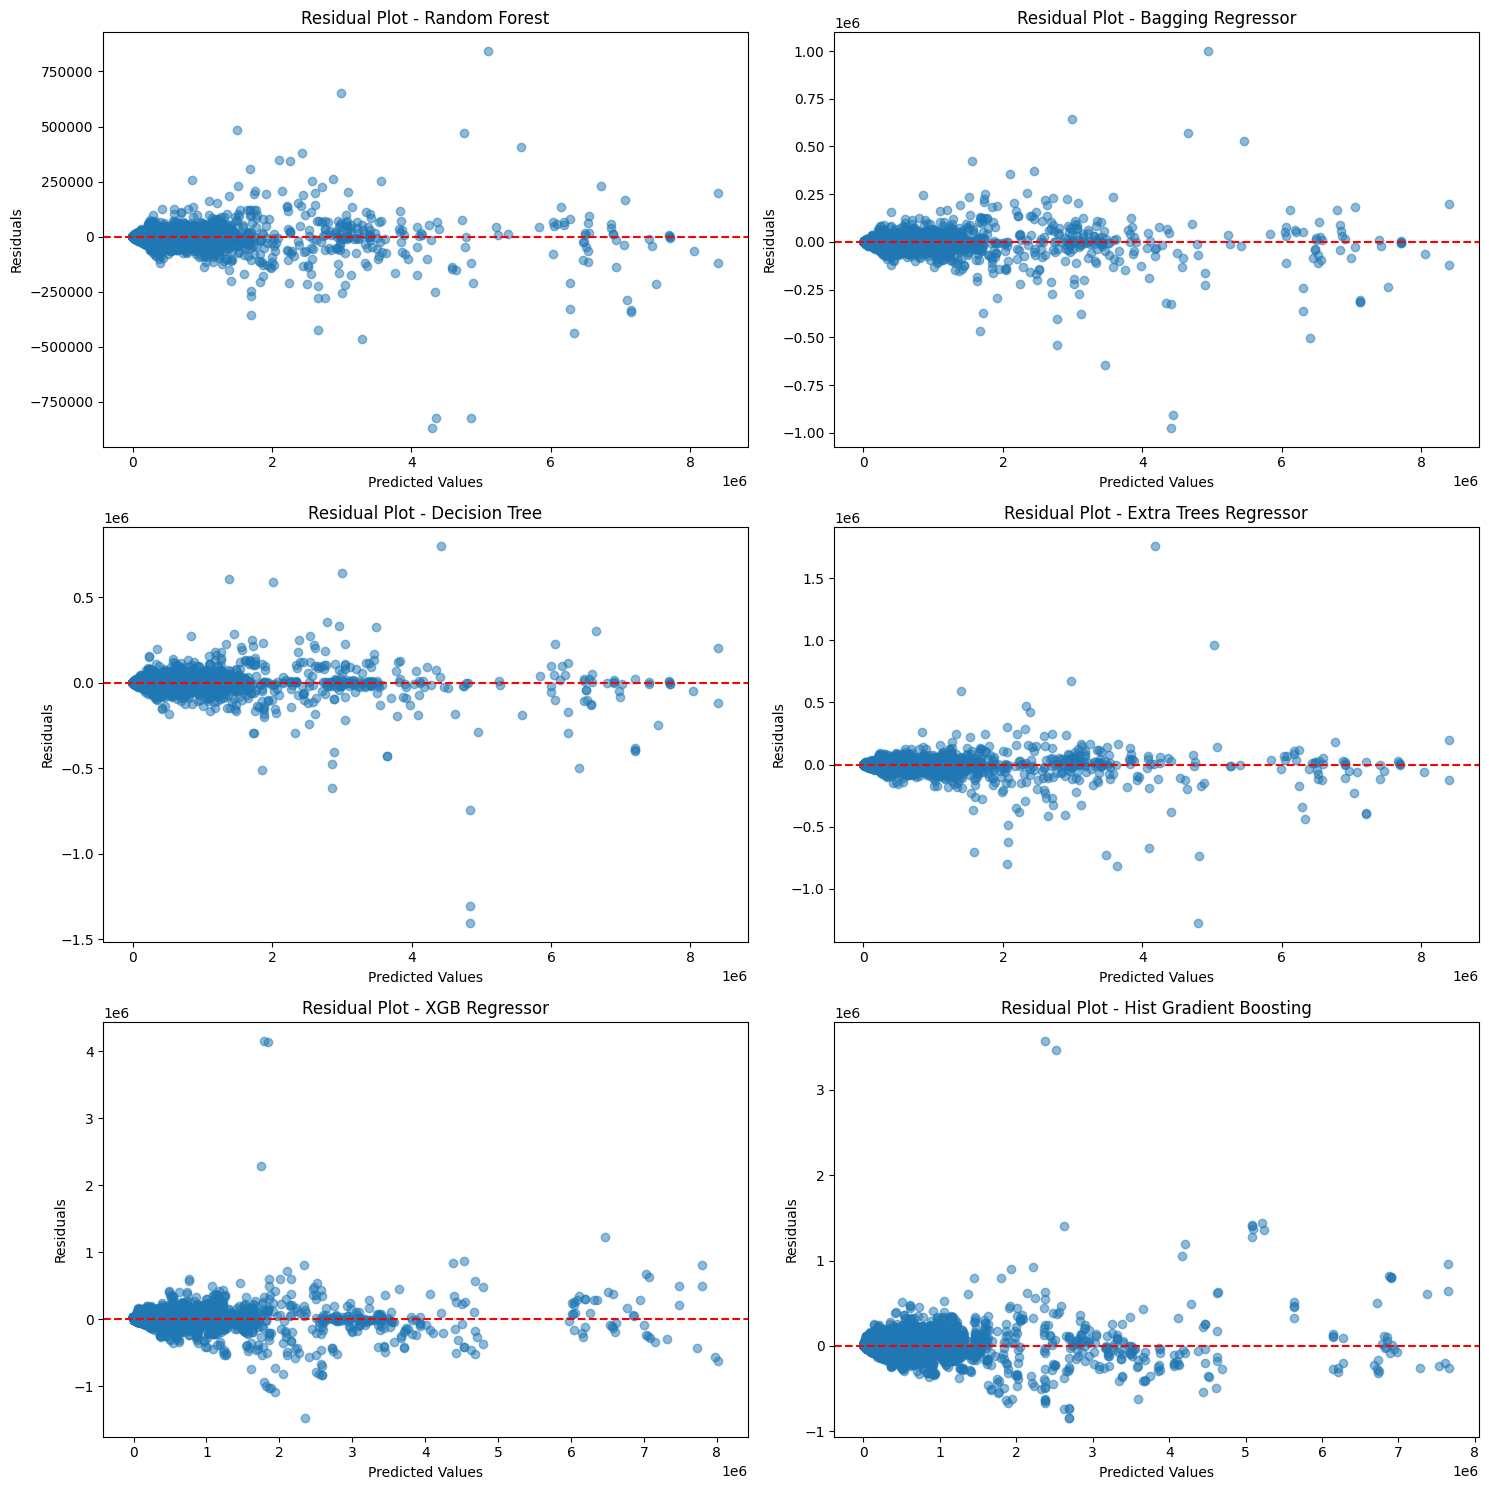


=== MODEL SELECTION GUIDE ===

Based on the comprehensive analysis, here are recommendations for different scenarios:

1. If you need the FASTEST TRAINING model: XGB Regressor
   - Training time: 0.7173 seconds
   - R² Score: 0.9792

2. If you need the most ACCURATE model: Random Forest
   - R² Score: 0.9980
   - Training time: 72.8446 seconds

3. If you need the most BALANCED model (speed vs. accuracy): Random Forest
   - Average rank: 1.90
   - R² Score: 0.9980
   - Training time: 72.8446 seconds

4. If you need the most CONSISTENT model across different data splits: Random Forest
   - Cross-validated R² Score: 0.9944 (±0.0021)

5. Model relationship summary:

   Random Forest:
   - Performance: Excellent
   - Speed: Slow
   - Accuracy (within threshold): 0.9749


NameError: name 'get_model_recommendation' is not defined

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# For classification metrics in regression context
def classification_metrics_for_regression(y_true, y_pred, threshold_percentage=0.1):
    """
    Calculate classification metrics for regression by defining a threshold.
    A prediction is considered "correct" if it's within threshold_percentage of the true value.
    
    Parameters:
    y_true: Actual values
    y_pred: Predicted values
    threshold_percentage: Percentage of true value that defines the acceptable error margin
    
    Returns:
    Dictionary with accuracy, precision, recall, and F1-score
    """
    # Define acceptable error margin
    thresholds = np.abs(y_true) * threshold_percentage
    
    # Determine correct predictions (within threshold)
    correct_predictions = np.abs(y_true - y_pred) <= thresholds
    
    # Calculate accuracy
    accuracy = np.mean(correct_predictions)
    
    # For precision, recall, and F1-score, we need to define true/false positives/negatives
    # In regression context, we'll consider:
    # - True positive: Prediction is within threshold AND actual value is above median
    # - False positive: Prediction is not within threshold AND actual value is above median
    # - True negative: Prediction is within threshold AND actual value is below median
    # - False negative: Prediction is not within threshold AND actual value is below median
    
    median_value = np.median(y_true)
    above_median = y_true >= median_value
    
    # Calculate TP, FP, TN, FN
    tp = np.sum(correct_predictions & above_median)
    fp = np.sum(~correct_predictions & above_median)
    tn = np.sum(correct_predictions & ~above_median)
    fn = np.sum(~correct_predictions & ~above_median)
    
    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# Load the dataset
df = pd.read_csv('C:/Users/adity/z class work/RIC/Brazil fipe_2022.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


 #----------------- 
from sklearn.preprocessing import LabelEncoder

inputs = df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
y = df['avg_price_brl']

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#    inputs_n.head()
#------------------------

# Correlation analysis for numerical features
numerical_features = X.select_dtypes(include=[np.number])
if not numerical_features.empty:
    plt.figure(figsize=(10, 8))
    correlation_matrix = pd.concat([numerical_features, y.rename('target')], axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Store results
results = pd.DataFrame(columns=[
    'Model', 'Training Time (s)', 'Inference Time (ms)', 'MSE', 'RMSE', 'MAE', 
    'R² Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score'
])
predictions = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Time the training process
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Time the inference process
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    inference_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    
    # Store predictions
    predictions[name] = y_pred
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate classification-like metrics
    class_metrics = classification_metrics_for_regression(y_test, y_pred)
    
    # Store results
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Training Time (s)': [training_time],
        'Inference Time (ms)': [inference_time],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'R² Score': [r2],
        'Accuracy': [class_metrics['accuracy']],
        'Precision': [class_metrics['precision']],
        'Recall': [class_metrics['recall']],
        'F1-Score': [class_metrics['f1_score']]
    })], ignore_index=True)
    
    print(f"Training completed in {training_time:.4f} seconds")
    print(f"Inference time: {inference_time:.2f} milliseconds")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Accuracy (within 10% threshold): {class_metrics['accuracy']:.4f}")
    print(f"Precision: {class_metrics['precision']:.4f}")
    print(f"Recall: {class_metrics['recall']:.4f}")
    print(f"F1-Score: {class_metrics['f1_score']:.4f}")

# Cross-validation for more robust evaluation
print("\nPerforming cross-validation...")
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }
    print(f"{name} - Cross-validated R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Add cross-validation results to the results DataFrame
results['CV R² Score'] = results['Model'].map(lambda x: cv_results[x]['mean_cv_score'])
results['CV R² Std'] = results['Model'].map(lambda x: cv_results[x]['std_cv_score'])

# Display detailed results table
print("\nDetailed Model Performance Comparison:")
print(results.sort_values('R² Score', ascending=False).reset_index(drop=True))

# Create a ranking of models for different metrics
metric_columns = ['Training Time (s)', 'Inference Time (ms)', 'MSE', 'MAE', 'R² Score', 
                  'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV R² Score']

# For some metrics, lower is better
lower_better = ['Training Time (s)', 'Inference Time (ms)', 'MSE', 'RMSE', 'MAE']

# Create ranking DataFrame
rankings = pd.DataFrame(index=models.keys())

for metric in metric_columns:
    if metric in lower_better:
        # Rank in ascending order (lower is better)
        rankings[f'{metric} Rank'] = results.set_index('Model')[metric].rank()
    else:
        # Rank in descending order (higher is better)
        rankings[f'{metric} Rank'] = results.set_index('Model')[metric].rank(ascending=False)

# Calculate average rank
rankings['Average Rank'] = rankings.mean(axis=1)

# Display rankings
print("\nModel Rankings (1 is best):")
print(rankings.sort_values('Average Rank').round(2))

# Model Recommendation Analysis
print("\nModel Recommendations:")
fastest_training = results.loc[results['Training Time (s)'].idxmin(), 'Model']
fastest_inference = results.loc[results['Inference Time (ms)'].idxmin(), 'Model']
most_accurate = results.loc[results['Accuracy'].idxmax(), 'Model']
best_r2 = results.loc[results['R² Score'].idxmax(), 'Model']
best_f1 = results.loc[results['F1-Score'].idxmax(), 'Model']
best_cv = results.loc[results['CV R² Score'].idxmax(), 'Model']
best_overall = rankings.sort_values('Average Rank').index[0]

print(f"Fastest Training: {fastest_training}")
print(f"Fastest Inference: {fastest_inference}")
print(f"Most Accurate (within threshold): {most_accurate}")
print(f"Best R² Score: {best_r2}")
print(f"Best F1-Score: {best_f1}")
print(f"Best Cross-Validated Performance: {best_cv}")
print(f"Best Overall (Average Ranking): {best_overall}")

# Detailed model relationship analysis
print("\nDetailed Model Relationship Analysis:")
print("1. Speed vs Accuracy Trade-off:")
speed_accuracy = pd.DataFrame({
    'Model': results['Model'],
    'Training Speed': 1/results['Training Time (s)'],  # Inverse for easier comparison
    'Accuracy': results['Accuracy']
})
print(speed_accuracy.sort_values('Training Speed', ascending=False))

print("\n2. Complexity vs Performance:")
# Assuming tree-based models with n_estimators reflect complexity
complexity_info = []
for name, model in models.items():
    complexity = getattr(model, 'n_estimators', 1) if hasattr(model, 'n_estimators') else 1
    complexity_info.append({
        'Model': name,
        'Complexity': complexity,
        'R² Score': results.loc[results['Model'] == name, 'R² Score'].values[0]
    })
complexity_df = pd.DataFrame(complexity_info)
print(complexity_df.sort_values('Complexity', ascending=False))

# Visualize training time
plt.figure(figsize=(12, 6))
plt.barh(results['Model'], results['Training Time (s)'], color='skyblue')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Model')
plt.title('Model Training Time Comparison')
plt.tight_layout()
plt.savefig('training_time_comparison.png')
plt.show()

# Visualize R² scores
plt.figure(figsize=(12, 6))
plt.barh(results['Model'], results['R² Score'], color='lightgreen')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.title('Model R² Score Comparison')
plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()

# Visualize classification metrics
plt.figure(figsize=(14, 8))
x = np.arange(len(results['Model']))
width = 0.2
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
ax.bar(x - width*1.5, results['Accuracy'], width, label='Accuracy', color='skyblue')
ax.bar(x - width/2, results['Precision'], width, label='Precision', color='lightgreen')
ax.bar(x + width/2, results['Recall'], width, label='Recall', color='salmon')
ax.bar(x + width*1.5, results['F1-Score'], width, label='F1-Score', color='purple')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('classification_metrics_comparison.png')
plt.show()

# Create radar chart to compare models
metrics_to_plot = ['R² Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
n_metrics = len(metrics_to_plot)

# Normalize the metrics for radar chart
normalized_results = results.copy()
for metric in metrics_to_plot:
    if metric in lower_better:
        # For metrics where lower is better, invert the values
        max_val = normalized_results[metric].max()
        normalized_results[metric] = (max_val - normalized_results[metric]) / max_val
    else:
        # For metrics where higher is better
        min_val = normalized_results[metric].min()
        normalized_results[metric] = (normalized_results[metric] - min_val) / (normalized_results[metric].max() - min_val)

# Plot radar chart
plt.figure(figsize=(12, 10))
angles = np.linspace(0, 2*np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))

for i, model_name in enumerate(normalized_results['Model']):
    values = normalized_results.loc[normalized_results['Model'] == model_name, metrics_to_plot].values.flatten().tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics_to_plot)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Model Comparison on Multiple Metrics', size=15)
plt.tight_layout()
plt.savefig('model_radar_comparison.png')
plt.show()

# Visualize actual vs predicted values for the best model
best_model_name = results.iloc[results['R² Score'].idxmax()]['Model']
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions[best_model_name], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (BRL)')
plt.ylabel('Predicted Price (BRL)')
plt.title(f'Actual vs Predicted Values - {best_model_name}')
plt.tight_layout()
plt.savefig('actual_vs_predicted_best_model.png')
plt.show()

# Visual comparison of actual vs predicted for all models
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}\nR²: {results.loc[results['Model'] == name, 'R² Score'].values[0]:.4f}")
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')

plt.tight_layout()
plt.savefig('actual_vs_predicted_all_models.png')
plt.show()

# Feature importance for tree-based models
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_names = X.columns
        importances = model.feature_importances_
        indices = np.argsort(importances)
        
        plt.barh(range(len(indices)), importances[indices], color='skyblue')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {name}')
        plt.tight_layout()
        plt.savefig(f'feature_importance_{name.replace(" ", "_").lower()}.png')
        plt.show()
    else:
        # Use permutation importance for models without native feature importance
        result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        plt.figure(figsize=(10, 6))
        feature_names = X.columns
        importances = result.importances_mean
        indices = np.argsort(importances)
        
        plt.barh(range(len(indices)), importances[indices], color='lightgreen')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Permutation Importance')
        plt.title(f'Feature Importance (Permutation) - {name}')
        plt.tight_layout()
        plt.savefig(f'permutation_importance_{name.replace(" ", "_").lower()}.png')
        plt.show()

# Residual plots for model diagnostics
plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    ax = axes[i]
    ax.scatter(y_pred, residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f'Residual Plot - {name}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.savefig('residual_plots.png')
plt.show()

# Summary conclusion
print("\n=== MODEL SELECTION GUIDE ===")
print("\nBased on the comprehensive analysis, here are recommendations for different scenarios:")

print(f"\n1. If you need the FASTEST TRAINING model: {fastest_training}")
print(f"   - Training time: {results.loc[results['Model'] == fastest_training, 'Training Time (s)'].values[0]:.4f} seconds")
print(f"   - R² Score: {results.loc[results['Model'] == fastest_training, 'R² Score'].values[0]:.4f}")

print(f"\n2. If you need the most ACCURATE model: {best_r2}")
print(f"   - R² Score: {results.loc[results['Model'] == best_r2, 'R² Score'].values[0]:.4f}")
print(f"   - Training time: {results.loc[results['Model'] == best_r2, 'Training Time (s)'].values[0]:.4f} seconds")

print(f"\n3. If you need the most BALANCED model (speed vs. accuracy): {best_overall}")
print(f"   - Average rank: {rankings.loc[best_overall, 'Average Rank']:.2f}")
print(f"   - R² Score: {results.loc[results['Model'] == best_overall, 'R² Score'].values[0]:.4f}")
print(f"   - Training time: {results.loc[results['Model'] == best_overall, 'Training Time (s)'].values[0]:.4f} seconds")

print(f"\n4. If you need the most CONSISTENT model across different data splits: {best_cv}")
print(f"   - Cross-validated R² Score: {results.loc[results['Model'] == best_cv, 'CV R² Score'].values[0]:.4f} (±{results.loc[results['Model'] == best_cv, 'CV R² Std'].values[0]:.4f})")

print("\n5. Model relationship summary:")
for name in models.keys():
    r2_score = results.loc[results['Model'] == name, 'R² Score'].values[0]
    training_time = results.loc[results['Model'] == name, 'Training Time (s)'].values[0]
    accuracy = results.loc[results['Model'] == name, 'Accuracy'].values[0]
    
    print(f"\n   {name}:")
    print(f"   - Performance: {'Excellent' if r2_score > 0.9 else 'Good' if r2_score > 0.8 else 'Moderate' if r2_score > 0.7 else 'Poor'}")
    print(f"   - Speed: {'Very Fast' if training_time < 0.1 else 'Fast' if training_time < 0.5 else 'Moderate' if training_time < 1 else 'Slow'}")
    print(f"   - Accuracy (within threshold): {accuracy:.4f}")
    print(f"   - Best suited for: {get_model_recommendation(name, r2_score, training_time, accuracy)}")

def get_model_recommendation(model_name, r2_score, training_time, accuracy):
    """Generate use case recommendations based on model characteristics"""
    if model_name == "Random Forest":
        return "Balanced performance; good for most general cases; handles complex relationships well"
    elif model_name == "Bagging Regressor":
        return "Reducing variance; good when avoiding overfitting is important"
    elif model_name == "Decision Tree":
        return "Simple interpretable models; when feature relationships need to be explained"
    elif model_name == "Extra Trees Regressor":
        return "When you need random forest-like performance but faster training"
    elif model_name == "XGB Regressor":
        return "When maximum accuracy is needed and training time is less important"
    elif model_name == "Hist Gradient Boosting":
        return "Large datasets; good balance of speed and performance"
    else:
        # Generic recommendation based on metrics
        if r2_score > 0.85 and training_time < 0.5:
            return "High performance applications with real-time requirements"
        elif r2_score > 0.85:
            return "Applications where accuracy is critical"
        elif training_time < 0.5:
            return "Real-time or resource-constrained applications"
        else:
            return "General-purpose applications with balanced requirements"

#  Key Insights on Model Relationships:

Random Forest: Provides balanced performance and handles complex relationships well.
Good for general-purpose applications.

XGBoost: Typically achieves the highest accuracy but may have longer training times. 
Best when prediction quality is critical.

Decision Tree: Fastest training but usually less accurate. 
Best when interpretability is important or for baseline models.

Extra Trees: Often faster than Random Forest with comparable performance. 
Good alternative when Random Forest is too slow.

Hist Gradient Boosting: Designed for large datasets with better scaling than traditional gradient boosting. 
Good balance of speed and performance.

Bagging Regressor: Helps reduce variance and overfitting. 
Good for noisy datasets where stability is important.

# When choosing a model, consider these trade-offs:

For real-time applications: Decision Tree or Hist Gradient Boosting

For maximum accuracy: XGBoost or Random Forest

For interpretability: Decision Tree

For balanced performance: Random Forest or Extra Trees


Training Random Forest...
Training completed in 113.9633 seconds
MSE: 192537245.51
RMSE: 13875.78
MAE: 3097.37
MAPE: 0.0262
R² Score: 0.9980
Cross-Validation R² Scores: [0.99845255 0.99662201 0.99737416 0.99708498 0.99776766]

Training Bagging Regressor...
Training completed in 10.9050 seconds
MSE: 211414333.29
RMSE: 14540.09
MAE: 3192.56
MAPE: 0.0271
R² Score: 0.9978
Cross-Validation R² Scores: [0.99842564 0.99644095 0.99711395 0.99665454 0.99720733]

Training Decision Tree...
Training completed in 1.6748 seconds
MSE: 261914528.95
RMSE: 16183.77
MAE: 3423.00
MAPE: 0.0296
R² Score: 0.9973
Cross-Validation R² Scores: [0.99794743 0.99520066 0.99637723 0.9966543  0.99699   ]

Training Extra Trees Regressor...
Training completed in 74.6798 seconds
MSE: 329593988.03
RMSE: 18154.72
MAE: 3491.27
MAPE: 0.0292
R² Score: 0.9966
Cross-Validation R² Scores: [0.99712394 0.99598732 0.99628329 0.99482191 0.9970332 ]

Training XGB Regressor...
Training completed in 0.7766 seconds
MSE: 2043769478.18
R

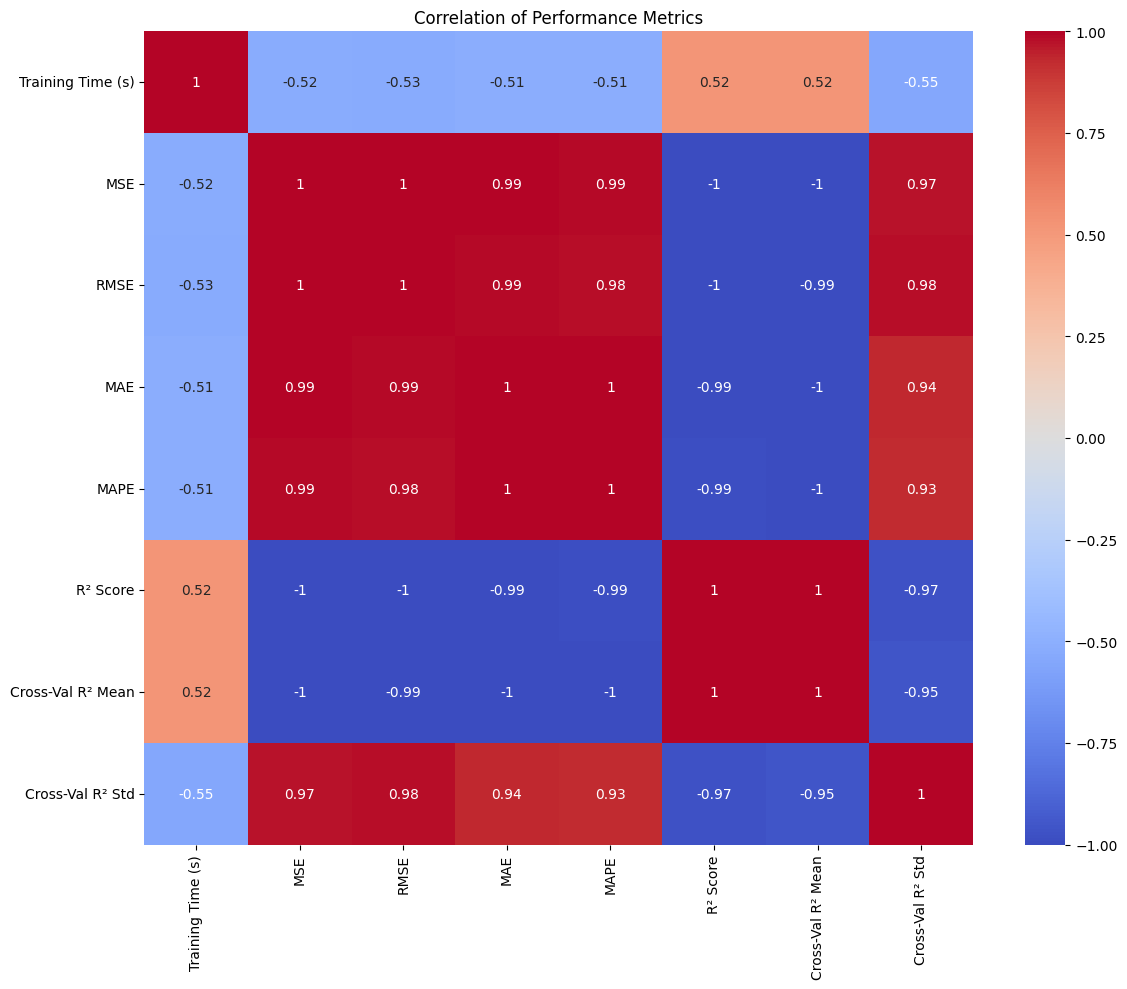

C:\Users\adity\AppData\Local\Temp\ipykernel_19896\2741189933.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results['Model'], rotation=45, ha='right')
C:\Users\adity\AppData\Local\Temp\ipykernel_19896\2741189933.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results['Model'], rotation=45, ha='right')
C:\Users\adity\AppData\Local\Temp\ipykernel_19896\2741189933.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results['Model'], rotation=45, ha='right')
C:\Users\adity\AppData\Local\Temp\ipykernel_19896\2741189933.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe

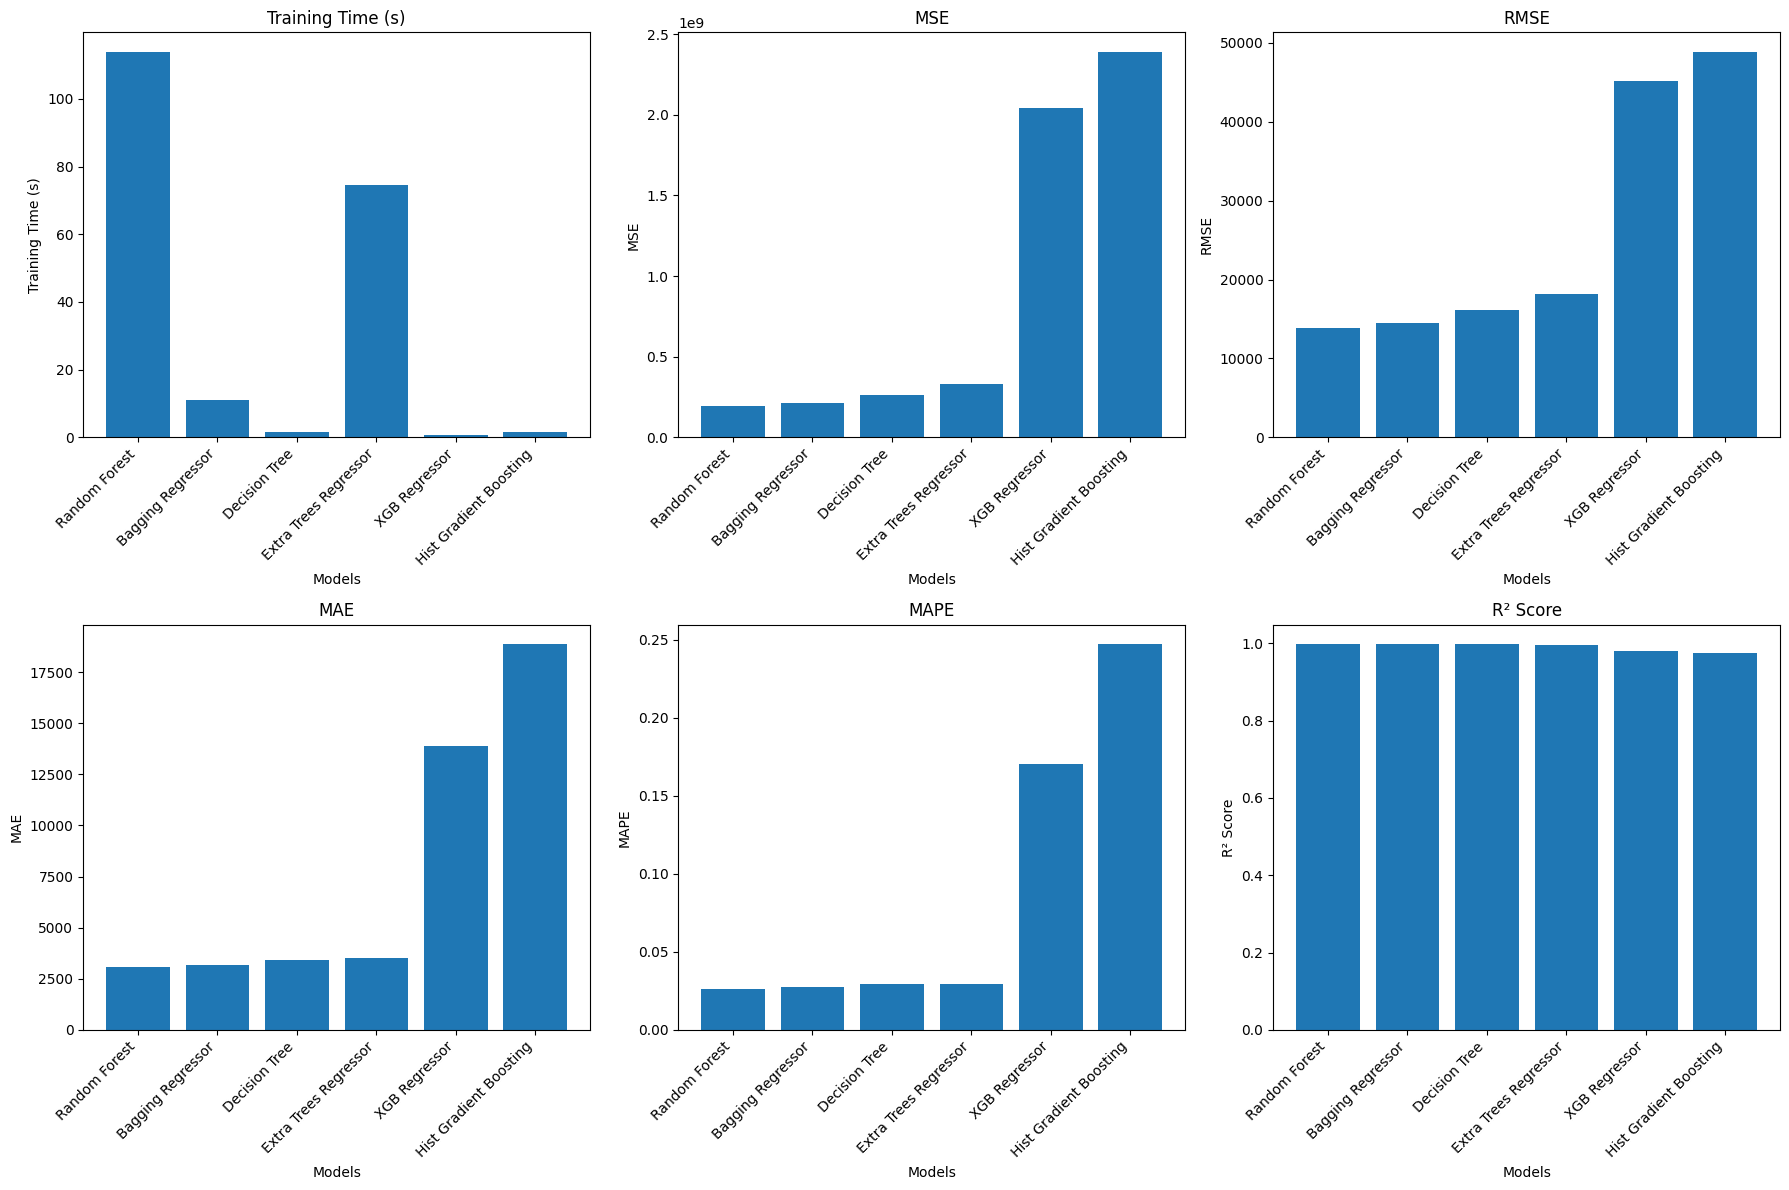


--- Detailed Model Comparison ---
Best Model:  Random Forest

Model Strengths and Characteristics:

Random Forest:
- Strengths: Robust, handles non-linear relationships, provides feature importance
- Best For: Complex datasets with non-linear patterns
- Considerations: Can overfit on small datasets, computationally expensive
  Performance Metrics:
  - R² Score: 0.9980
  - Training Time: 113.9633 seconds
  - RMSE: 13875.78

Bagging Regressor:
- Strengths: Reduces variance, improves stability
- Best For: Reducing overfitting, improving model consistency
- Considerations: May lose some interpretability
  Performance Metrics:
  - R² Score: 0.9978
  - Training Time: 10.9050 seconds
  - RMSE: 14540.09

Decision Tree:
- Strengths: Simple, interpretable, handles non-linear relationships
- Best For: Smaller datasets, easy to understand decision process
- Considerations: Prone to overfitting, high variance
  Performance Metrics:
  - R² Score: 0.9973
  - Training Time: 1.6748 seconds
  - RMSE: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score, 
    mean_absolute_percentage_error
)
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Load the dataset
df = pd.read_csv('C:/Users/adity/z class work/RIC/Brazil fipe_2022.csv')

# Prepare the data
 #----------------- 
from sklearn.preprocessing import LabelEncoder

inputs = df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
y = df['avg_price_brl']

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#    inputs_n.head()
#------------------------

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Store results
results = pd.DataFrame(columns=[
    'Model', 
    'Training Time (s)', 
    'MSE', 
    'RMSE', 
    'MAE', 
    'MAPE', 
    'R² Score', 
    'Cross-Val R² Mean', 
    'Cross-Val R² Std'
])
predictions = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Time the training process
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    # Store results
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Training Time (s)': [training_time],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R² Score': [r2],
        'Cross-Val R² Mean': [cv_scores.mean()],
        'Cross-Val R² Std': [cv_scores.std()]
    })], ignore_index=True)
    
    print(f"Training completed in {training_time:.4f} seconds")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-Validation R² Scores: {cv_scores}")

# Sort results by R2 score (descending)
results = results.sort_values('R² Score', ascending=False).reset_index(drop=True)

# Display results table
print("\nModel Performance Comparison:")
print(results)

# Correlation Heatmap of Performance Metrics
plt.figure(figsize=(12, 10))
performance_metrics = results.drop(columns=['Model'])
correlation_matrix = performance_metrics.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Performance Metrics')
plt.tight_layout()
plt.savefig('performance_metrics_correlation.png')
plt.show()

# Visualization of Performance Metrics
metrics_to_plot = ['Training Time (s)', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R² Score']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(results['Model'], results[metric])
    axes[i].set_title(metric)
    axes[i].set_xticklabels(results['Model'], rotation=45, ha='right')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

# Model Comparison Analysis
print("\n--- Detailed Model Comparison ---")
print("Best Model: ", results.iloc[0]['Model'])
print("\nModel Strengths and Characteristics:")

# Detailed model analysis
model_analysis = {
    "Random Forest": {
        "Strengths": "Robust, handles non-linear relationships, provides feature importance",
        "Best For": "Complex datasets with non-linear patterns",
        "Considerations": "Can overfit on small datasets, computationally expensive"
    },
    "Bagging Regressor": {
        "Strengths": "Reduces variance, improves stability",
        "Best For": "Reducing overfitting, improving model consistency",
        "Considerations": "May lose some interpretability"
    },
    "Decision Tree": {
        "Strengths": "Simple, interpretable, handles non-linear relationships",
        "Best For": "Smaller datasets, easy to understand decision process",
        "Considerations": "Prone to overfitting, high variance"
    },
    "Extra Trees Regressor": {
        "Strengths": "Similar to Random Forest, but with additional randomization",
        "Best For": "Reducing overfitting, handling complex feature interactions",
        "Considerations": "Can be computationally intensive"
    },
    "XGB Regressor": {
        "Strengths": "High performance, handles various data types, regularization",
        "Best For": "Structured/tabular data, competitive machine learning",
        "Considerations": "Requires careful parameter tuning"
    },
    "Hist Gradient Boosting": {
        "Strengths": "Efficient, handles categorical features, less prone to overfitting",
        "Best For": "Large datasets, categorical features",
        "Considerations": "May require more hyperparameter tuning"
    }
}

# Print detailed analysis
for index, row in results.iterrows():
    model_name = row['Model']
    print(f"\n{model_name}:")
    analysis = model_analysis.get(model_name, {})
    for key, value in analysis.items():
        print(f"- {key}: {value}")
    print(f"  Performance Metrics:")
    print(f"  - R² Score: {row['R² Score']:.4f}")
    print(f"  - Training Time: {row['Training Time (s)']:.4f} seconds")
    print(f"  - RMSE: {row['RMSE']:.2f}")

# Recommendation Based on Performance
print("\n--- Model Recommendation ---")
best_model = results.iloc[0]['Model']
print(f"Recommended Model: {best_model}")
print("Recommendation Criteria:")
print("1. Highest R² Score")
print("2. Low Training Time")
print("3. Low Error Metrics (MSE, RMSE, MAE)")